##### <div style="color:white;background-color:lightblue;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">EMAIL SPAM DETECTION</div>

### <a id="100" style="color:lightblue">Importing packages :</a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### <a id="60" style="color:lightblue; text-decoration: underline black;">Loading Dataset:</a>

In [2]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4070,ham,I've reached home n i bathe liao... U can call...,NaN,NaN,NaN
332,spam,Call Germany for only 1 pence per minute! Call...,NaN,NaN,NaN
354,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [8]:
df.describe(include="all")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
df.shape

(5572, 5)

In [10]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [12]:
df.head(3)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [13]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head(3)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


##### Let us check for any missing values:-

In [14]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

##### Now, Find out the duplicates and if any, remove it:-

In [15]:
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print('-'*5)
print(df.duplicated().sum())

403
-----
0


In [16]:
df.shape

(5169, 2)

In [17]:
df.head(3)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


### <a id="61" style="color: lightblue;"> Exploratory Data Analysis (EDA): </a>
First, we will check the percentage distribution of target

In [18]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

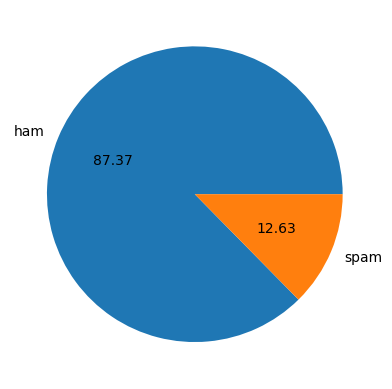

In [19]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalance

To deep dive in data, let us count the number of characters,words, sentences in the text

In [20]:
df['num_characters'] = df['Text'].apply(len)
df.head(3)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [21]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(3)

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [22]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(3)

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


##### Let us check the mathematical description of these new features, with respect to the target feature:-

In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


##### Ham :

In [24]:
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


##### Spam :

In [25]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Looking at both the mean, we can say that the span are longer, in therms of characters, sentences and words

Let us plot the same

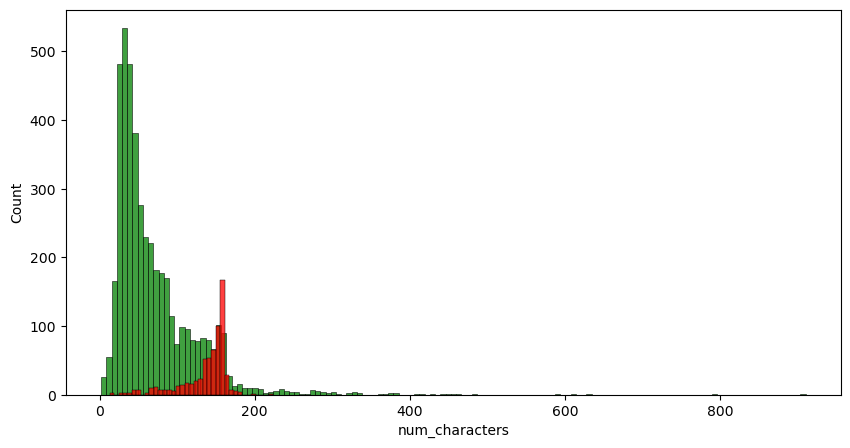

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target'] == 0]['num_characters'], color = 'green')
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')
plt.show()

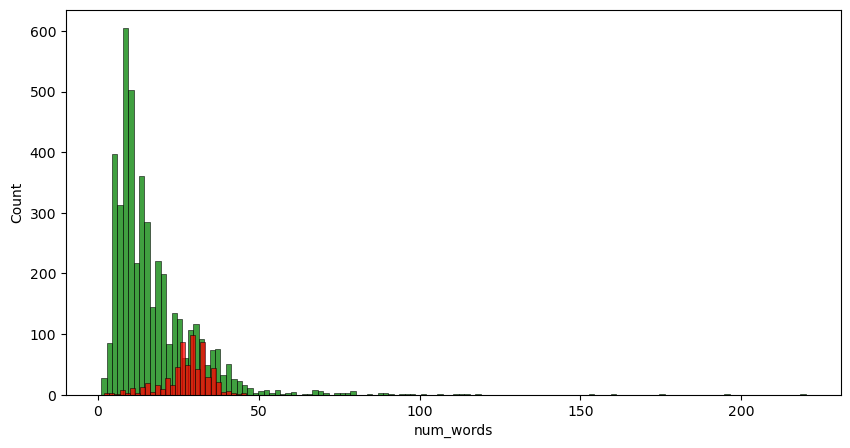

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target'] == 0]['num_words'], color = 'green')
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')
plt.show()

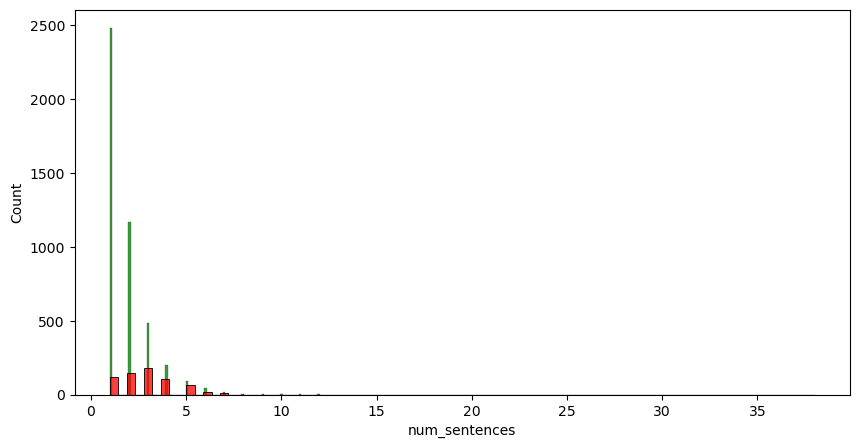

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target'] == 0]['num_sentences'], color = 'green')
sns.histplot(df[df['Target'] == 1]['num_sentences'],color='red')
plt.show()

Let us see the relation between these features:-

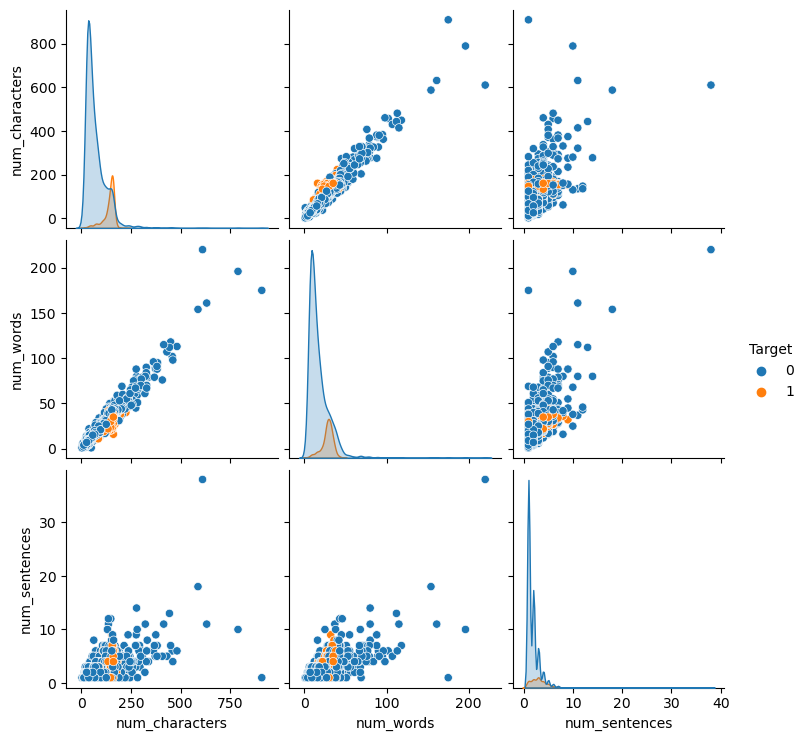

In [29]:
sns.pairplot(df,hue='Target')
plt.show()

num_sentences and num_character graph looks roughly linear num_words also shows similar graph with num_sentences and num_character

Also, the data consist of Outlier



Let us find the co relation :-

<Axes: >

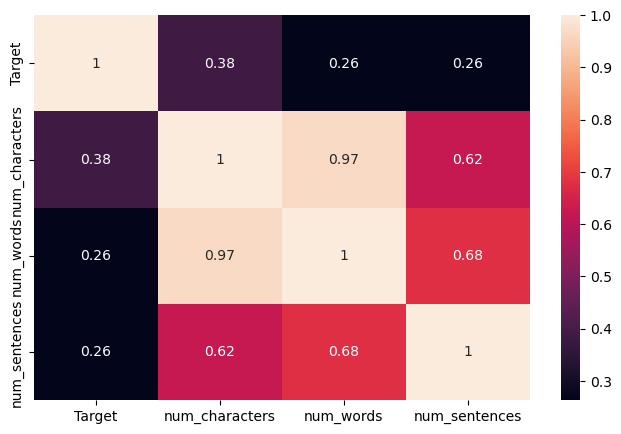

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Target', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

num_words and num_character are highly co related.

all three features have strong co relation with each other!

we will take one feature out of it, that will be num_characters because it has highest co relation with target among all (0.38)

### <a id="61" style="color: lightblue;"> Data Preprocessing: </a>
##### Lower case
##### Tokenization
##### Removing special characters
##### Removing stop words and punctuation
##### Stemming

In [31]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [32]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    Text = y[:]
    y.clear()
    for i in Text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            y.append(i)
    ps = PorterStemmer()
    Text = y[:]
    y.clear()
    for i in Text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [33]:
df['Transformed_Text'] = df['Text'].apply(transform_text)
df.head(3)

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


Let us plot word cloud with respect to target variable :-

In [34]:
from wordcloud import WordCloud

In [35]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

Word Cloud for Spam SMS

In [36]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_Text'].str.cat(sep=" "))

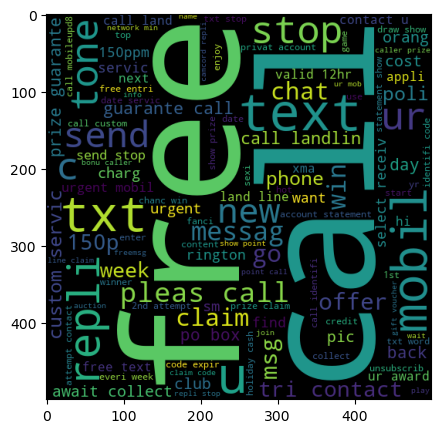

In [37]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

Word Cloud for Ham SMS

In [38]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_Text'].str.cat(sep=" "))

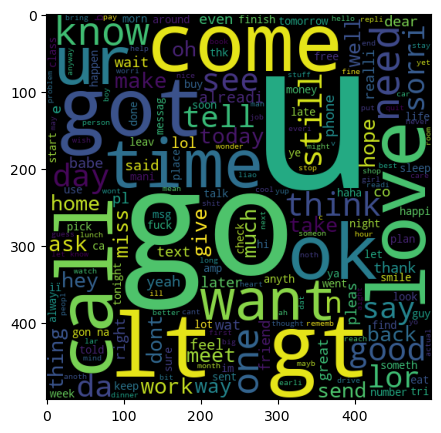

In [39]:
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)

Let us find top 50 words used in both ham and spam messages :-

Top 50 words in Spam :-

In [40]:
spam_corpus = []
for message in df[df['Target'] == 1]['Transformed_Text'].to_list():
    for word in message.split():
        spam_corpus.append(word)

In [41]:
from collections import Counter

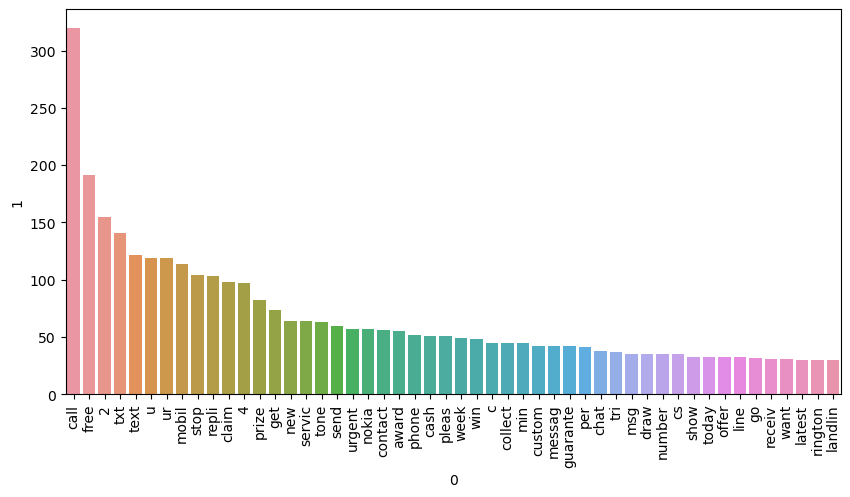

In [42]:
spam_corpus_dataframe = pd.DataFrame(Counter(spam_corpus).most_common(50))
plt.figure(figsize = (10,5))
sns.barplot( x = spam_corpus_dataframe[0], y = spam_corpus_dataframe[1])
plt.xticks(rotation = 'vertical')
plt.show()

Top 50 words in Ham :-

In [43]:
ham_corpus = []
for message in df[df['Target'] == 0]['Transformed_Text'].to_list():
    for word in message.split():
        ham_corpus.append(word)

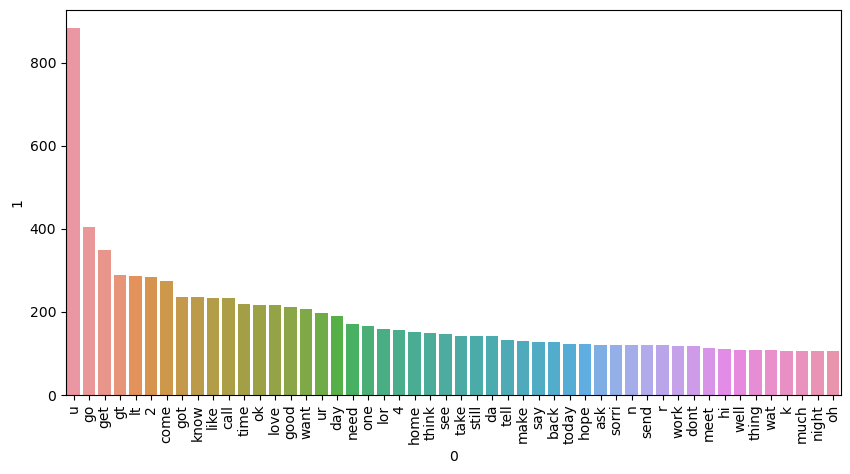

In [44]:
ham_corpus_dataframe = pd.DataFrame(Counter(ham_corpus).most_common(50))
plt.figure(figsize = (10,5))
sns.barplot( x = ham_corpus_dataframe[0], y = ham_corpus_dataframe[1])
plt.xticks(rotation = 'vertical')
plt.show()

### <a id="61" style="color: lightblue;"> Model Building: </a>

We need to convert text into vectors

By using Bag Of Words:-

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer()

In [47]:
X = cv.fit_transform(df['Transformed_Text']).toarray()

In [48]:
y = df['Target'].values

In [49]:
print(X.shape)
print(y.shape)

(5169, 6708)
(5169,)


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 40)

In [52]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,gnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,gnb_y_pred))
print('-'*20)
print(precision_score(y_test,gnb_y_pred))

0.8785769528228925
--------------------
[[1006  142]
 [  15  130]]
--------------------
0.47794117647058826


In [55]:
mnb.fit(X_train, y_train)
mnb_y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,mnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,mnb_y_pred))
print('-'*20)
print(precision_score(y_test,mnb_y_pred))

0.9791183294663574
--------------------
[[1129   19]
 [   8  137]]
--------------------
0.8782051282051282


In [56]:
bnb.fit(X_train, y_train)
bnb_y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,bnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,bnb_y_pred))
print('-'*20)
print(precision_score(y_test,bnb_y_pred))

0.9729311678267595
--------------------
[[1140    8]
 [  27  118]]
--------------------
0.9365079365079365


In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=40)
abc = AdaBoostClassifier(n_estimators=50, random_state=40)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=40)
xgb = XGBClassifier(n_estimators=50,random_state=40)

In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)  
    return accuracy,precision

In [60]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9350348027842227
Precision -  0.7163120567375887
For  KN
Accuracy -  0.9234338747099768
Precision -  1.0
For  NB
Accuracy -  0.9791183294663574
Precision -  0.8782051282051282
For  DT
Accuracy -  0.9443155452436195
Precision -  0.9506172839506173
For  LR
Accuracy -  0.9752513534416086
Precision -  0.9448818897637795
For  RF
Accuracy -  0.9690641918020109
Precision -  0.981651376146789
For  AdaBoost
Accuracy -  0.974477958236659
Precision -  0.9375
For  GBDT
Accuracy -  0.9644238205723125
Precision -  1.0
For  xgb
Accuracy -  0.9775715390564579
Precision -  0.9754098360655737


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.923434,1.000000
7,GBDT,0.964424,1.000000
5,RF,0.969064,0.981651
8,xgb,0.977572,0.975410
3,DT,0.944316,0.950617
4,LR,0.975251,0.944882
6,AdaBoost,0.974478,0.937500
2,NB,0.979118,0.878205
0,SVC,0.935035,0.716312


In [62]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [63]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.923434
1,GBDT,Accuracy,0.964424
2,RF,Accuracy,0.969064
3,xgb,Accuracy,0.977572
4,DT,Accuracy,0.944316
5,LR,Accuracy,0.975251
6,AdaBoost,Accuracy,0.974478
7,NB,Accuracy,0.979118
8,SVC,Accuracy,0.935035
9,KN,Precision,1.000000


<Figure size 1200x1200 with 0 Axes>

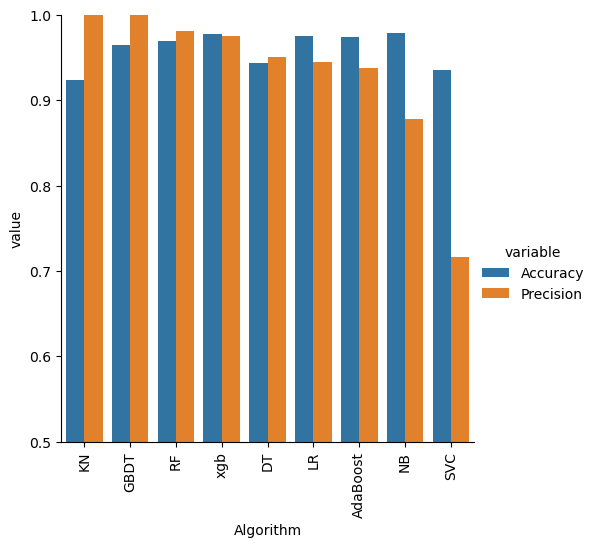

In [64]:
plt.figure(figsize=(12,12))
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=40)
abc = AdaBoostClassifier(n_estimators=50, random_state=40)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=40)
xgb = XGBClassifier(n_estimators=50,random_state=40)

In [66]:
new_clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def new_train_classifier(new_clf,X_train,y_train,X_test,y_test):
    new_clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)    
    return accuracy,precision

In [68]:
accuracy_scores = []
precision_scores = []
for name,new_clf in new_clfs.items():  
    current_accuracy,current_precision = train_classifier(new_clf, X_train,y_train,X_test,y_test)   
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9350348027842227
Precision -  0.7163120567375887
For  KN
Accuracy -  0.9234338747099768
Precision -  1.0
For  NB
Accuracy -  0.9791183294663574
Precision -  0.8782051282051282
For  DT
Accuracy -  0.9443155452436195
Precision -  0.9506172839506173
For  LR
Accuracy -  0.9752513534416086
Precision -  0.9448818897637795
For  RF
Accuracy -  0.9690641918020109
Precision -  0.981651376146789
For  AdaBoost
Accuracy -  0.974477958236659
Precision -  0.9375
For  GBDT
Accuracy -  0.9644238205723125
Precision -  1.0
For  xgb
Accuracy -  0.9775715390564579
Precision -  0.9754098360655737


 ### <a id="61" style="color: lightblue;"> Conclusion: </a>

In [69]:
new_performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'New Accuracy':accuracy_scores,'New Precision':precision_scores}).sort_values('New Precision',ascending=False)
performance_df = pd.merge(performance_df, new_performance_df, on = 'Algorithm')
performance_df

,Algorithm,Accuracy,Precision,New Accuracy,New Precision
0,KN,0.923434,1.000000,0.923434,1.000000
1,GBDT,0.964424,1.000000,0.964424,1.000000
2,RF,0.969064,0.981651,0.969064,0.981651
3,xgb,0.977572,0.975410,0.977572,0.975410
4,DT,0.944316,0.950617,0.944316,0.950617
5,LR,0.975251,0.944882,0.975251,0.944882
6,AdaBoost,0.974478,0.937500,0.974478,0.937500
7,NB,0.979118,0.878205,0.979118,0.878205
8,SVC,0.935035,0.716312,0.935035,0.716312
